### Let's get an idea of how often these pipes are cleaned

In [12]:
df1.set_index('last_cleaned').groupby(pd.Grouper(freq='M')).count()

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills
last_cleaned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-31,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9
2009-04-30,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,0,28,28,28,28,28,28
2009-05-31,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,26,26,26,26
2009-06-30,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,0,25,25,25,25,25,25
2009-07-31,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,14,14,14,14,14,14
2009-08-31,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,20,20,20,20,20,20
2009-09-30,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,26,26,26,26
2009-10-31,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,0,41,41,41,41,41,41
2009-11-30,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,2,29,29,29,29,29,29


In [23]:
df2[df2.cause == 'grease'].months_elapsed.describe()

count    406.000000
mean      10.553701
std       10.427192
min        0.032855
25%        3.400481
50%        7.474486
75%       14.702561
max       63.574201
Name: months_elapsed, dtype: float64

#### _Looking for the repeat offenders..._

In [27]:
df1.num_spills_24mos[df1.num_spills_24mos > 1].value_counts()

2     180
3      75
4      32
5      27
6      19
7      12
8       7
9       5
13      1
12      1
11      1
10      1
Name: num_spills_24mos, dtype: int64

#### _Locations of the most frequent SSOs in 2 years_

In [28]:
df1[['spill_street_address']][df1.num_spills_24mos >= 9]

,spill_street_address
33,6606 Swiss Oaks
40,6606 Swiss Oaks
84,108 Chappie James Way
153,6606 Swiss Oaks
593,10800 Entrance Rd Ne
727,10800 Entrance Rd Ne
738,10800 Entrance Rd Ne
751,10823 Entrance Rd Ne
762,10700 Entrance Rd Ne


#### _Total number of gallons spilled by the most frequent SSOs in 2 years_

In [29]:
df1.total_gallons[df1.num_spills_24mos >= 9].agg('sum')

3538455

#### _Most common root causes of SSOs_

In [49]:
df1.root_cause.value_counts()

structural           1237
grease                611
debris                444
rain event            353
contractor            164
lift station          125
other                  61
vandalism              48
rain event             48
vandalism              24
roots                  22
lift station           15
i/i                    12
contractor              8
na                      7
by pass pump leak       3
other                   1
Name: root_cause, dtype: int64

In [33]:
df1[['spill_street_address', 'unit_id_1','unit_id_2', 'unit_type', 'asset_type']].head(15)

,spill_street_address,unit_id_1,unit_id_2,unit_type,asset_type
0,3200 Thousand Oaks Dr,66918,66917,gravity,sewer main
1,6804 S Flores St,24250,24193,gravity,sewer main
2,215 Audrey Alene Dr,2822,3351,gravity,sewer main
3,3602 Se Military Dr,92804,92805,gravity,sewer main
4,100 Pansy Ln,61141,49543,gravity,sewer main
5,3200 S Hackberry St,38907,26117,gravity,sewer main
6,9910 Sugarloaf Dr,85120,85363,gravity,sewer main
7,3507 Piedmont Ave,26128,24334,gravity,sewer main
8,349 Alicia,47292,47293,gravity,sewer main
9,1502 W Mistletoe Ave,14241,14896,gravity,sewer main


In [34]:
df1.unit_id_1.value_counts()[df1.unit_id_1.value_counts() > 7]

52470     15
LS200     14
1187      13
903059    12
LS199     12
62085     10
903060    10
1210      10
47822     10
LS188     10
424896     8
29988      8
11989      8
LS201      8
Name: unit_id_1, dtype: int64

In [36]:
df1['root_cause'].value_counts()

structural           1237
grease                611
debris                444
rain event            353
contractor            164
lift station          125
other                  61
vandalism              48
rain event             48
vandalism              24
roots                  22
lift station           15
i/i                    12
contractor              8
na                      7
by pass pump leak       3
other                   1
Name: root_cause, dtype: int64

In [37]:
df1['spill_street_address'].value_counts()[df1.spill_street_address.value_counts() > 7]

6606 Swiss Oaks          24
108 Chappie James Way    20
700 Holbrook             16
10800 Entrance Rd Ne     14
6305 Cagnon Rd           13
6785 Cagnon Rd           12
1800 Austin Hwy          12
1427 Harry Wurzbach      12
23500 Ih 10 W            12
668 Holbrook             10
10102 Us Hwy 90 W         9
3847 Thousand Oaks        8
Name: spill_street_address, dtype: int64

#### _Below shows the most frequent SSOs that are caused by grease._

In [40]:
df1.loc[(df1['counts'] >= 7) & (df1['root_cause'] == 'grease')]

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,counts
171,2018-08-12,75000,0.0,8/12/2018 4:15:00 PM,8/12/2018 6:30:00 PM,2.25,i/i,diluted by heavy rain water,leon creek,903060,903059,creek bed - spilled into leon creek,leon creek,6,8,2018,33,0,66.0,27.15,frp,2014,0.42,0.20,9,8,outfall,sewer main,NaT,0.25,2018-08-12,True,120,grease,na,6606 Swiss Oaks,True,24
569,2016-09-26,20,0.0,9/26/2016 11:00:00 AM,9/26/2016 11:00:00 AM,0.00,i/i,cleaned area,salado creek,62085,62088,ground,none,0,9,2016,40,0,0.0,8.46,,2015,4.75,1.36,4,4,gravity,sewer main,NaT,0.00,2016-09-26,False,0,grease,"Increase FCS,",1427 Harry Wurzbach,False,12
1317,2013-10-12,60,0.0,10/12/2013 1:24:00 PM,10/12/2013 2:00:00 PM,0.60,grease,cleaned main,dos rios,2386,15741,alley,none,1,10,2013,41,0,8.0,252.14,ct,1950,0.12,0.00,1,0,gravity,sewer main,2012-08-09,0,NaT,False,0,grease,"Increase FCS,",3714 Neer Ave,False,7
1852,2012-02-05,50,20.0,2/5/2012 5:38:00 PM,2/5/2012 6:20:00 PM,0.70,grease,cleaned main,dos rios,13472,26491,street,none,3,2,2012,6,0,8.0,27.21,cas,1988,0.14,2.30,3,2,siphon,sewer main,2011-11-10,0,NaT,False,0,grease,na,7930 Flores St S,False,7
1868,2012-01-28,200,100.0,1/28/2012 5:45:00 PM,1/28/2012 7:00:00 PM,1.25,grease,cleaned main,dos rios,12811,13472,drainage culvert,harlandale creek,3,1,2012,4,0,8.0,143.40,cas,1988,0.00,2.94,5,3,siphon,sewer main,2011-11-10,0,NaT,False,0,grease,na,7930 Flores St S,False,7
3034,2009-06-09,2000,0.0,6/9/2009 12:30:00 PM,6/9/2009 3:30:00 PM,3.00,grease,cleaned main,dos rios,24234,26490,creek bed,na,3,6,2009,24,0,8.0,106.70,pvc,1988,0.00,0.00,1,0,gravity,sewer main,2009-05-02,0,NaT,False,0,grease,na,7930 Flores St S,False,7
3072,2009-05-02,30,0.0,5/2/2009 5:30:00 PM,5/2/2009 6:00:00 PM,0.50,grease,cleaned main,dos rios,18257,18255,drainage culvert,na,6,5,2009,18,0,8.0,318.60,pvc,1991,0.00,0.00,1,0,gravity,sewer main,NaT,0,NaT,False,0,grease,na,7930 Flores St S,False,7


### What can we see by year installed?

In [43]:
df1.installation_year.value_counts().sort_index()

1899      4
1900      5
1904      1
1906      7
1909      3
1910      1
1911      1
1912      1
1914      2
1915      4
1916      6
1918      6
1920     15
1921      1
1922      3
1923      7
1925      7
1926      5
1927     19
1928     18
1929      6
1930      7
1931      2
1933      1
1934      3
1935      6
1937      2
1939      4
1940      1
1941      4
1944      1
1945     14
1946     36
1947     17
1948     51
1949     40
1950     58
1951     19
1952     25
1953     19
1954     36
1955     27
1956     39
1957     35
1958     28
1959     58
1960     42
1961     33
1962     38
1963     61
1964     46
1965     89
1966     49
1967     41
1968     43
1969     27
1970     36
1971     36
1972     59
1973    128
1974     55
1975     28
1976     40
1977     43
1978     46
1979     38
1980     39
1981     25
1982     47
1983     74
1984     45
1985     35
1986     59
1987     58
1988     72
1989     55
1990     28
1991     19
1992     39
1993     18
1994     57
1995     14
1996     20
1997

#### _Spills by installation year._

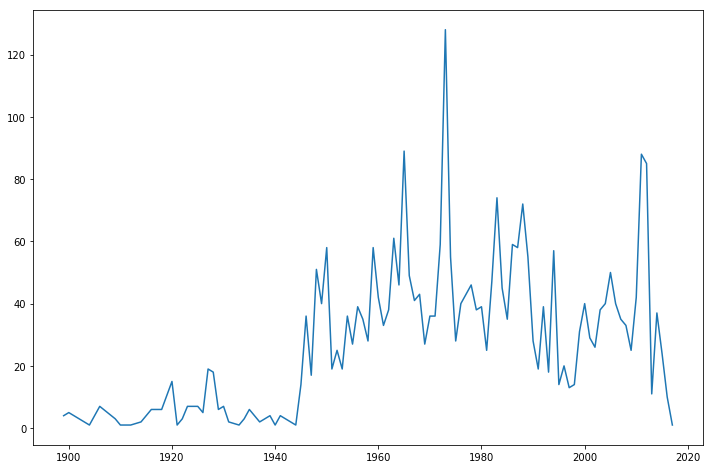

In [44]:
plt.figure(figsize=(12,8))
plt.plot(df1[df1.installation_year < 9999].groupby('installation_year')['spill_street_address'].count())

In [159]:
overall_month_seasonality = pd.DataFrame(df1[df1.cause == 'grease'].groupby(['year', 'month'])['report_date'].count())

In [160]:
overall_month_seasonality

report_date
year month             
2009 1                6
     2                8
     3               11
     4               12
     5               11
     6                8
     7                9
     8                8
     9                7
     10               6
     11              18
     12               7
2010 1               20
     2               15
     3                6
     4                3
     5                7
     6                6
     7                6
     8               13
     9               12
     10              11
     11               8
     12              18
2011 1               20
     2               18
     3               10
     4               13
     5                5
     6               11
     7                7
     8               11
     9               19
     10              23
     11              10
     12              13
2012 1               15
     2               17
     3               13
     4                9
     5               11
     6               16
     7                8
     8               10
     9               14
     10               8
     11              10
     12              16
2013 1               21
     2                6
     3               11
     4                8
     5                9
     6                6
     7                7
     8                4
     9                3
     10               7
     11               7
     12              12
2014 1                7
     2                4
     3                6
     4                3
     5                5
     6                4
     7                5
     8                5
     9                1
     10               4
     11               1
     12               6
2015 1                3
     2                5
     3                8
     4                4
     5                3
     6                2
     7                3
     8                6
     9                7
     10               7
     11               6
     12              13
2016 1               12
     2                7
     3                2
     4                7
     5                3
     6                4
     7                2
     8                1
     9                3
     10               6
     11               6
     12               6
2017 1                6
     2                7
     3                6
     4                4
     5                9
     6                4
     7                4
     8               10
     9                3
     10               6
     11              10
     12               2
2018 1                6
     2                9
     3                5
     4                2
     5                5
     6                2
     7                5
     8                5
     9                3
     10               3
     11               4
     12               2
2019 1                3
     2                4
     3                6

### Below, we see again colder months as an influence.

In [134]:
df2[(df2.root_cause == 'grease') & (df2.months_elapsed <= 6)].groupby('month').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,months_elapsed
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,2,8,8,8,8,8,8,8
2,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,2,13,13,13,13,13,13,13
3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,1,9,9,9,9,9,9,9
4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5
5,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,2,7,7,7,7,7,7,7
6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5
7,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,4,4,4,4,4,4,4
8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,2,8,8,8,8,8,8,8
9,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8,8


In [135]:
df2[(df2.root_cause != 'grease') & (df2.months_elapsed <= 6)].groupby('month').agg('count')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,months_elapsed
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,3,59,59,59,59,59,59,59
2,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,4,50,50,50,50,50,50,50
3,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,9,48,48,48,48,48,48,48
4,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,13,48,48,48,48,48,48,48
5,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,5,47,47,47,47,47,47,47
6,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,9,44,44,44,44,44,44,44
7,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,1,16,16,16,16,16,16,16
8,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,3,22,22,22,22,22,22,22
9,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,1,31,31,31,31,31,31,31
